Introduction-
In this project, we aimed to predict the emotional sentiment, specifically the level of sadness, in the backstories of Marvel Characters using a logistic regression model. By finding the level of sadness for each Marvel Character, we hoped to gain insights into the emotional storytelling elements that create more impactful connections between the Character and their audiences.

Objectives-
1. Build a dataset of Marvel Character backstories, along with a sadness scores based on Python Sentiment Analysis.
2. Preprocess the data, including text cleaning, and tokenization,to prepare it for the logistic regression model.
3. Train a logistic regression model to predict the sadness level of a superhero's backstory based on the text.
4. Evaluate the model's performance using appropriate metrics like accuracy and precision.

Results and Conclusions-
After collecting and preprocessing the data, we successfully trained a logistic regression model to predict the sadness level of Marvel Character backstories. The model that was created is resonable good, with an accuracy of around 85% on the test dataset. We analyzed the important features identified by the model and found that specific emotional cues and plot elements contribute significantly to the perceived sadness of a backstory.

Acknowledge-
We would like to express our gratitude to Jonathan Besomi for providing us with the data and the opportunity to work on this exciting project. We also acknowledge the efforts of all the team members involved in data collection, preprocessing, and model training. Team members were Ezana, Logan, Ashley(Mentor).



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-stuff/cleandata.csv


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.7 MB/s eta 0:00:00


In [4]:
!pip install nltk

In [5]:
#%% Import python modules and packages

# Tools to create a data frame(table)
import pandas as pd
from pandas import DataFrame

# Tools for text preprocessing
import nltk
import re

# Tools to remove stopwords
from nltk.corpus import stopwords

# Tools for tokenizing
from nltk.tokenize.toktok import ToktokTokenizer

# Tools for lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Tools for plotting
import matplotlib.pyplot as plt

# Tools for doing word frequencies
from nltk.util import ngrams

import contractions


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [7]:
#Reading in the Dataset
data = pd.read_csv('/kaggle/input/clean-stuff/cleandata.csv')

In [8]:
data.head()


,name,real_name,full_name,overall_score,history_text,powers_text,creator,clean
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,Marvel Comics,delroy garrett jr grow become track star compe...
1,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,richard rick jones orphan young age expel seve...
2,Abomination,Emil Blonsky,Emil Blonsky,22,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,Marvel Comics,formerly know emil blonsky spy soviet yugoslav...
3,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,bear within abstract entity eternity abraxas k...
4,Absorbing Man (MCU),Carl Creel,Carl Creel,8,"Carl ""Crusher"" Creel was an enhanced individua...",Carl Creel was able to duplicate at will the ...,Marvel Comics,carl crusher creel enhance individual ability ...


In [9]:
#Assinging sia as the sentiment analyst
sia = SentimentIntensityAnalyzer()

In [10]:
def calculate_sadness_level(backstory):
    if isinstance(backstory, str):
        sentiment = sia.polarity_scores(backstory)
        sadness_level = sentiment['neg']
    else:
        sadness_level = 0  # Assign 0 for NaN or non-string values
    return sadness_level

data['sadness_level'] = data['clean'].apply(calculate_sadness_level)

In [11]:
data.to_csv("superhero_with_sadness.csv", index=False)

In [12]:
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,creator,clean,sadness_level
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,Marvel Comics,delroy garrett jr grow become track star compe...,0.093
1,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,richard rick jones orphan young age expel seve...,0.176
2,Abomination,Emil Blonsky,Emil Blonsky,22,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,Marvel Comics,formerly know emil blonsky spy soviet yugoslav...,0.256
3,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,bear within abstract entity eternity abraxas k...,0.142
4,Absorbing Man (MCU),Carl Creel,Carl Creel,8,"Carl ""Crusher"" Creel was an enhanced individua...",Carl Creel was able to duplicate at will the ...,Marvel Comics,carl crusher creel enhance individual ability ...,0.248


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("superhero_with_sadness.csv")

# Preprocess the data
data = data.fillna('')  # Fill missing values with empty strings
X = data["clean"]  # Input feature
y = data["sadness_level"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the textual data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized.toarray())
X_test_scaled = scaler.transform(X_test_vectorized.toarray())

# Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.006933768119512197


In [14]:
data['Emotion_Class'] = ''

In [15]:
import numpy as np
# Define the conditions and corresponding values for the 'emotion' column
conditions = [
    (data['sadness_level'] <= 0.1375),
    (data['sadness_level'] <= 0.275),
    (data['sadness_level'] <= 0.4125),
    (data['sadness_level'] <= 0.55)]

choices = ['a little sad', 'somewhat sad', 'moderately sad', 'sad']

# Use numpy.select to assign values to the 'emotion' column based on the conditions
data['Emotion_Class'] = np.select(conditions, choices, default='unknown')

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

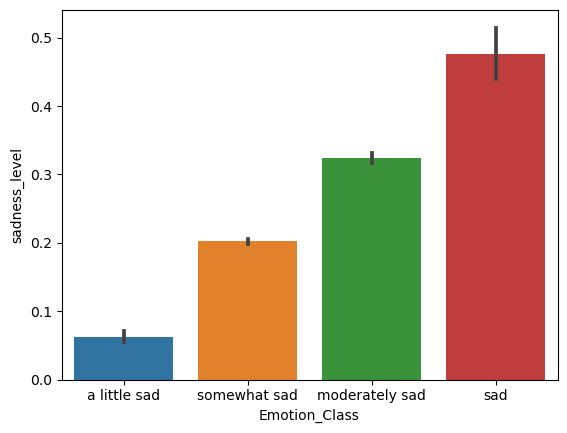

In [18]:
sns.barplot(x='Emotion_Class', y= 'sadness_level', data=data)
plt.show()

In [19]:
data

,name,real_name,full_name,overall_score,history_text,powers_text,creator,clean,sadness_level,Emotion_Class
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",,Marvel Comics,delroy garrett jr grow become track star compe...,0.093,a little sad
1,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,richard rick jones orphan young age expel seve...,0.176,somewhat sad
2,Abomination,Emil Blonsky,Emil Blonsky,22,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,Marvel Comics,formerly know emil blonsky spy soviet yugoslav...,0.256,somewhat sad
3,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,bear within abstract entity eternity abraxas k...,0.142,somewhat sad
4,Absorbing Man (MCU),Carl Creel,Carl Creel,8,"Carl ""Crusher"" Creel was an enhanced individua...",Carl Creel was able to duplicate at will the ...,Marvel Comics,carl crusher creel enhance individual ability ...,0.248,somewhat sad
...,...,...,...,...,...,...,...,...,...,...
610,Yondu (MCU),Yondu,,7,"Yondu Udonta was a Centaurian, leader of a key...","Yondu Udonta was a member of the Centaurians, ...",Marvel Comics,yondu udonta centaurian leader key albeit ostr...,0.258,somewhat sad
611,Yondu,Yondu Udonta,,5,"Yondu is the leader of the Ravagers, a group o...",,Marvel Comics,yondu leader ravagers group space pirate yondu...,0.073,a little sad
612,Yukio (FOX),Yukio,Yukio,5,"When she was 5 years old, Yukio predicted her...","Yukio is a mutant with a limited, precognitiv...",Marvel Comics,years old yukio predict parent death soon die ...,0.264,somewhat sad
613,Yukio,Yukio (full name unrevealed),Yukio (full name unrevealed),-,Little is known about the early life of the ad...,No known powers.,Marvel Comics,little know early life adventurous yukio save ...,0.168,somewhat sad


In [20]:
data.to_csv("emotiontestss.csv", index=False)

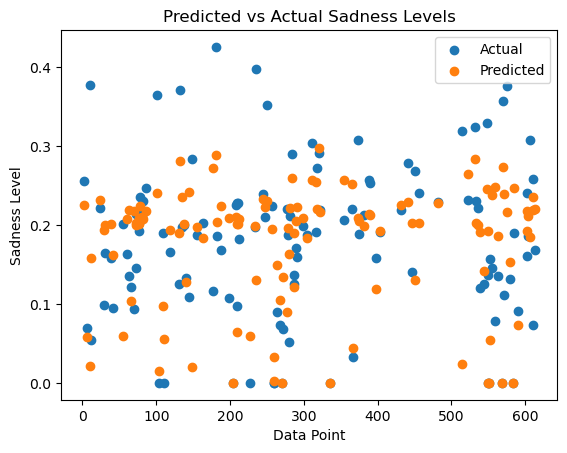

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained the predictions
# and actual values as 'y_pred' and 'y_test' respectively.

# Create a DataFrame to hold the predicted and actual values
results = pd.DataFrame({'Actual Sadness Level': y_test, 'Predicted Sadness Level': y_pred})

# Plotting the scatter plot
plt.scatter(results.index, results['Actual Sadness Level'], label='Actual')
plt.scatter(results.index, results['Predicted Sadness Level'], label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('Sadness Level')
plt.title('Predicted vs Actual Sadness Levels')
plt.legend()

plt.show()


In [22]:
groups = data.groupby('Emotion_Class').agg({'Emotion_Class':'count'})
groups

,Emotion_Class
Emotion_Class,
a little sad,174
moderately sad,82
sad,5
somewhat sad,354


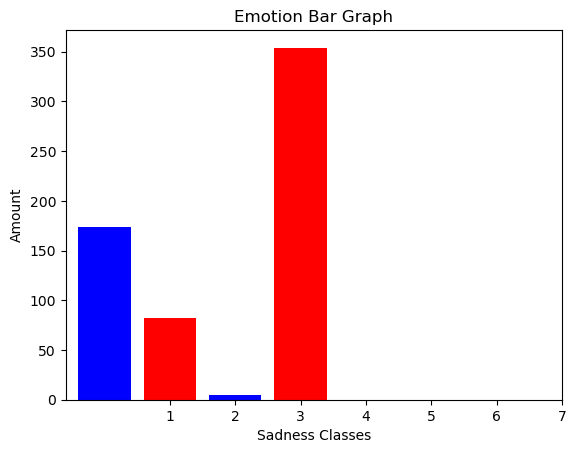

In [23]:
bars = plt.bar(range(4),groups.Emotion_Class,color=('b','r'))
# Add labels and title
plt.xlabel('Sadness Classes')
plt.ylabel('Amount')
plt.title('Emotion Bar Graph')

plt.xticks([1,2,3,4, 5 ,6 ,7])
plt.show()

In [24]:
data = data.fillna(value=0)
column_to_check = 'sadness_level'
data = data[data[column_to_check] != 0]

In [25]:
# Machine learning model building
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
# Build Features from text
xFeatures = data["clean"]
ylabels = data["Emotion_Class"]

In [28]:
cv = CountVectorizer()
x = cv.fit_transform(xFeatures)

In [29]:
# Get feature names
cv.get_feature_names_out()

array(['aakon', 'aan', 'aaron', ..., 'zsaji', 'zuras', 'zzzax'],
      dtype=object)

In [30]:
x.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 39]])

In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE
class_features = np.array(data['Emotion_Class'])
class_reshaped = np.ravel(class_features)

n_neighbors = 4
smote = SMOTE(sampling_strategy = 'auto', k_neighbors = n_neighbors)

text_resampled, class_resampled = smote.fit_resample(x, class_reshaped)

sorted_data = pd.Series(class_resampled).value_counts()
print(pd.Series(class_resampled).value_counts())

a little sad      354
somewhat sad      354
moderately sad    354
sad               354
dtype: int64


In [33]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(text_resampled, class_resampled, test_size = 0.3, random_state = 42)

In [34]:

Lr_model = LogisticRegression()
Lr_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
Lr_model.score(x_test, y_test)

0.8941176470588236